In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing CSVs
mouseData_path = "C:\\Users\\Scott Frazier-SMU\\Desktop\\SMU\\SMU_Homework_Sep2020\\05-Matplotlib\\Instructions\\Pymaceuticals\\data\\Mouse_metadata.csv"
studyResults_path = "C:\\Users\\Scott Frazier-SMU\\Desktop\\SMU\\SMU_Homework_Sep2020\\05-Matplotlib\\Instructions\\Pymaceuticals\\data\\Study_results.csv"

mouseData = pd.read_csv(mouseData_path)
mouseData.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#printing the head of csv
studyResults = pd.read_csv(studyResults_path)
studyResults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#printing df head after merging data
df = studyResults.merge(mouseData, on="Mouse ID", how="inner")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
#count for each mouse
df["Mouse ID"].value_counts() 

g989    13
r554    10
c282    10
i738    10
a251    10
        ..
d133     1
f932     1
n482     1
u153     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
#total count of unique mice
df["Mouse ID"].nunique() 

249

In [7]:
#duplicate mice
sum(df.duplicated(subset=["Mouse ID", "Timepoint"])) 

5

In [8]:
(df["Mouse ID"] + df["Timepoint"].astype(str)).value_counts() 

g9895     2
g9890     2
g98920    2
g98915    2
g98910    2
         ..
s56520    1
l89710    1
f96610    1
i73835    1
j23520    1
Length: 1888, dtype: int64

In [9]:
mask = df.duplicated(subset=["Mouse ID", "Timepoint"])
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
mask2 = df["Mouse ID"] != "g989"
df_clean = df.loc[mask2].reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [11]:
df_clean.describe() 

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [12]:
df_clean.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [13]:
#creating the summary table
drugGroups = df_clean.groupby("Drug Regimen")

avgTumor = drugGroups["Tumor Volume (mm3)"].mean()
medTumor = drugGroups["Tumor Volume (mm3)"].median()
varOfTumor = drugGroups["Tumor Volume (mm3)"].var()
stdDevTumor = drugGroups["Tumor Volume (mm3)"].std()
semOfTumor = drugGroups["Tumor Volume (mm3)"].sem()

summaryTable = pd.DataFrame()
summaryTable["Mean Tumor Volume"] = avgTumor
summaryTable["Median Tumor Volume"] = medTumor
summaryTable["Variance of Tumor Volume"] = varOfTumor
summaryTable["St. Deviation of Tumor Volume"] = stdDevTumor
summaryTable["St. Error Tumor Volume"] = semOfTumor

summaryTable

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,St. Deviation of Tumor Volume,St. Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


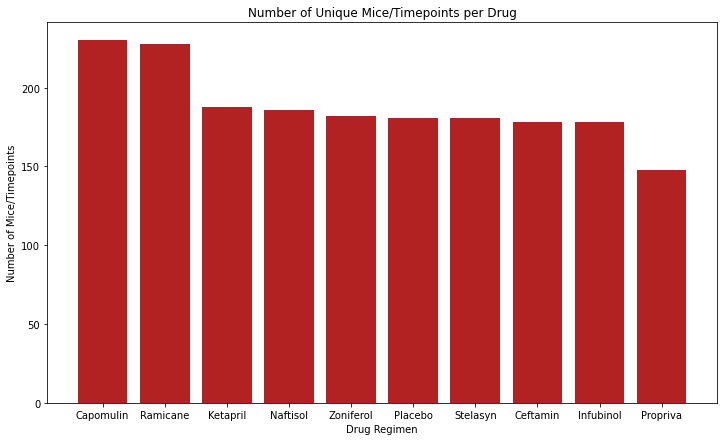

In [14]:
#graphing data with pylot
data = df_clean["Drug Regimen"].value_counts()

x = data.index
y = data.values

plt.figure(figsize=(12,7))
plt.bar(x, y, color="firebrick")

plt.title("Number of Unique Mice/Timepoints per Drug")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice/Timepoints")

plt.show()

findfont: Font family ['Lucida Calligraphy'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lucida Calligraphy'] not found. Falling back to DejaVu Sans.


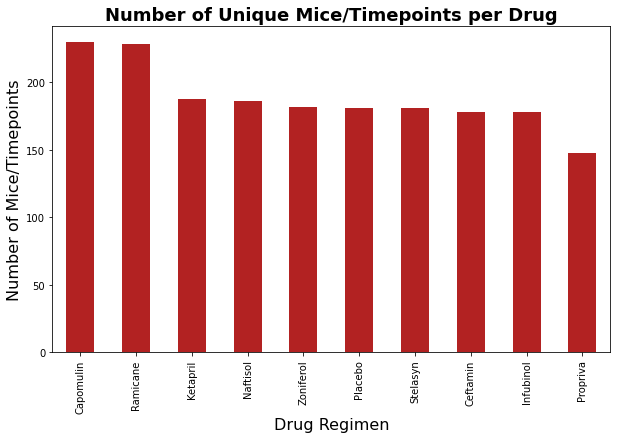

In [15]:
#graphing data with matplotlib
plt.figure(figsize=(10,6))

df_clean["Drug Regimen"].value_counts().plot(kind = "bar", color="firebrick")

plt.title("Number of Unique Mice/Timepoints per Drug", fontsize=18, fontweight="bold", fontname="Lucida Calligraphy")
plt.xlabel('Drug Regimen', fontsize=16, fontname="Lucida Calligraphy")
plt.ylabel("Number of Mice/Timepoints", fontsize=16, fontname="Lucida Calligraphy")

plt.show()

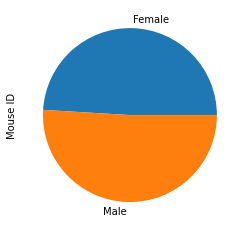

In [16]:
#first pie chart with pyplot
df_clean.groupby("Sex")["Mouse ID"].count().plot(kind="pie")

In [17]:
gender_data = df_clean.groupby("Sex")["Mouse ID"].count()
gender_data

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

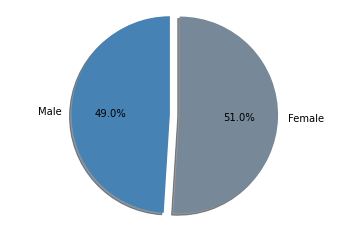

In [18]:
#second pie chart with matplotlib
labels = 'Male', 'Female'
sizes = [49, 51]
explode = (0, 0.1)
colors = ["steelblue", "lightslategrey"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal') 

plt.show()

In [19]:
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df_final = df_clean.loc[df_clean["Drug Regimen"].isin(regimens)].reset_index(drop=True)
df_final.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [20]:
df_final.groupby("Mouse ID").max()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a275,45,62.999356,3,Ceftamin,Female,20,28
a411,45,45.466677,1,Ramicane,Male,3,22
a444,45,45.000000,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...
y769,45,68.594745,4,Ceftamin,Female,6,27
y793,45,45.000000,2,Capomulin,Male,17,17
y865,45,64.729837,3,Ceftamin,Male,23,26


In [21]:
df_final.loc[(df_final["Mouse ID"] == 'a444')] 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
138,a444,0,45.000000,0,Ramicane,Female,10,25
139,a444,5,44.005975,0,Ramicane,Female,10,25
140,a444,10,44.512560,0,Ramicane,Female,10,25
141,a444,15,43.001280,0,Ramicane,Female,10,25
142,a444,20,41.714619,0,Ramicane,Female,10,25
143,a444,25,42.291394,0,Ramicane,Female,10,25
144,a444,30,42.786278,0,Ramicane,Female,10,25
145,a444,35,41.735951,0,Ramicane,Female,10,25
146,a444,40,42.504926,0,Ramicane,Female,10,25
147,a444,45,43.047543,0,Ramicane,Female,10,25


In [22]:
maxMice = df_final.groupby("Mouse ID").Timepoint.max().reset_index()
maxMice

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [23]:
df_regimen2 =  pd.DataFrame()

for indx, row in maxMice.iterrows():
    mask = ((df_final["Mouse ID"] == row["Mouse ID"]) & (df_final["Timepoint"] == row["Timepoint"]))
    found = df_final.loc[mask]
    df_regimen2 = df_regimen2.append(found)
    
df_regimen2 = df_regimen2.reset_index(drop=True)
df_regimen2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [24]:
df_regimen = df_final.merge(maxMice, on=["Mouse ID", "Timepoint"])
df_regimen.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25


In [25]:
drug_data = []

for drugs in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    found = df_regimen.loc[df_regimen["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = found.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(drugs)
    print()
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    print()
    print()

    drug_data.append(found.values)

Capomulin

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Ramicane

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Infubinol

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Ceftamin

The lower quartile of temperatur

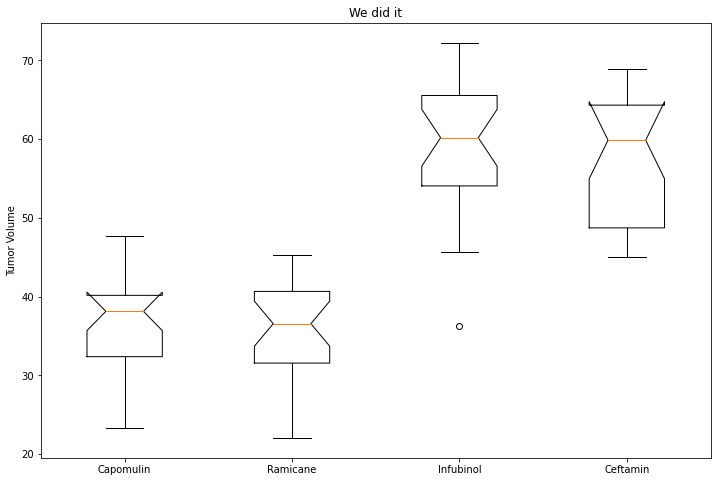

In [26]:
plt.figure(figsize=(12,8))

plt.boxplot(drug_data, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], notch=True)

plt.title('We did it')
plt.ylabel('Tumor Volume')

plt.show()

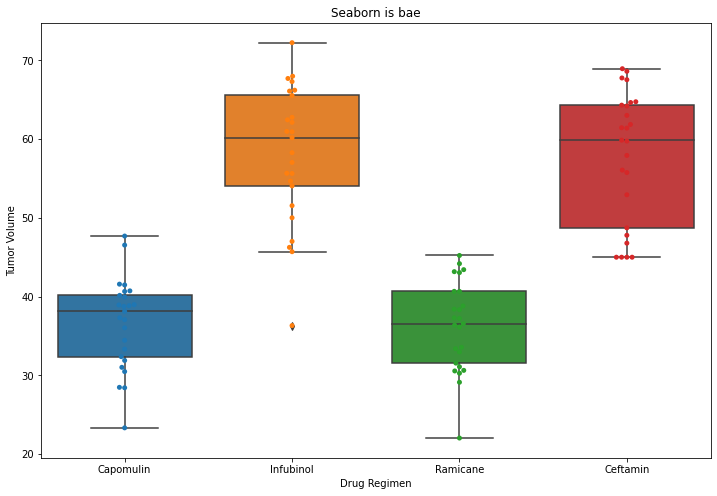

In [27]:
plt.figure(figsize=(12,8))

sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=df_regimen)
sns.swarmplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=df_regimen)

plt.title('Seaborn is bae')
plt.ylabel('Tumor Volume')

plt.show()

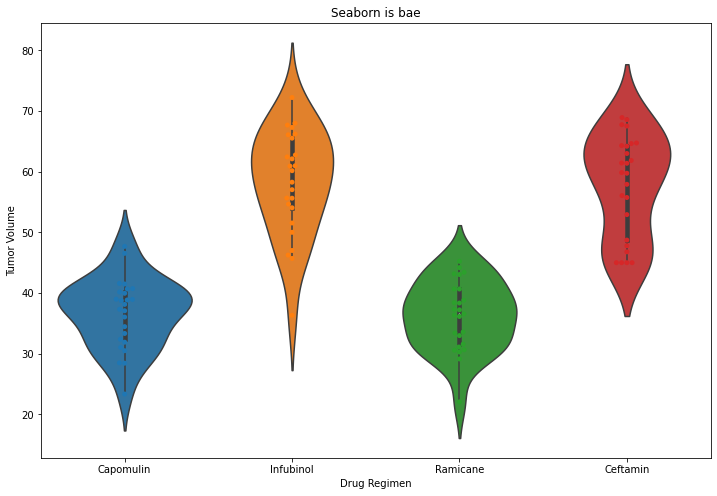

In [28]:
plt.figure(figsize=(12,8))

sns.violinplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=df_regimen)
sns.swarmplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=df_regimen)

plt.title('Seaborn is bae')
plt.ylabel('Tumor Volume')

plt.show()

In [29]:
mouse = df_clean.loc[df_clean['Mouse ID'] == "y793"].reset_index(drop=True)
mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,y793,0,45.000000,0,Capomulin,Male,17,17
1,y793,5,41.019913,0,Capomulin,Male,17,17
2,y793,10,41.630010,1,Capomulin,Male,17,17
3,y793,15,42.283665,1,Capomulin,Male,17,17
4,y793,20,40.716428,2,Capomulin,Male,17,17
5,y793,25,38.992734,2,Capomulin,Male,17,17
6,y793,30,35.726023,2,Capomulin,Male,17,17
7,y793,35,36.327870,2,Capomulin,Male,17,17
8,y793,40,31.475411,2,Capomulin,Male,17,17
9,y793,45,31.896238,2,Capomulin,Male,17,17


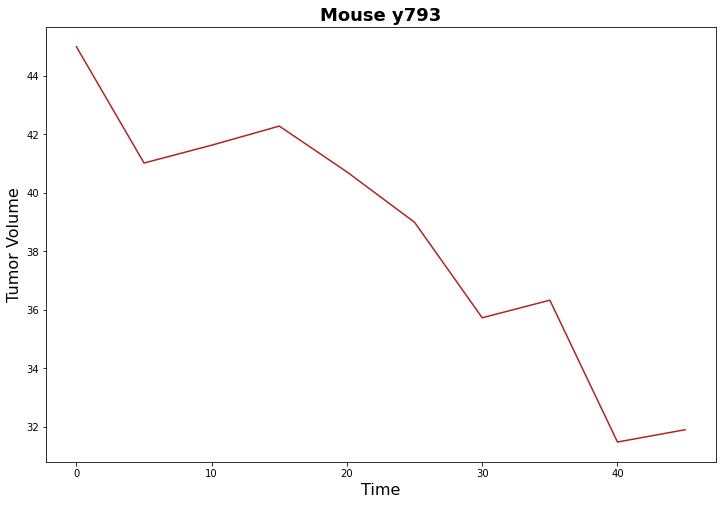

In [30]:
plt.figure(figsize=(12,8))

x = mouse.Timepoint
y = mouse["Tumor Volume (mm3)"]

plt.plot(x, y, color="firebrick")

plt.title("Mouse y793", fontsize=18, fontweight="bold", fontname="Lucida Calligraphy")
plt.xlabel('Time', fontsize=16, fontname="Lucida Calligraphy")
plt.ylabel("Tumor Volume", fontsize=16, fontname="Lucida Calligraphy")

plt.show()

In [31]:
weightTumor_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()
weightTumor_df.head()

<ipython-input-31-3c9d5255f96f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weightTumor_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


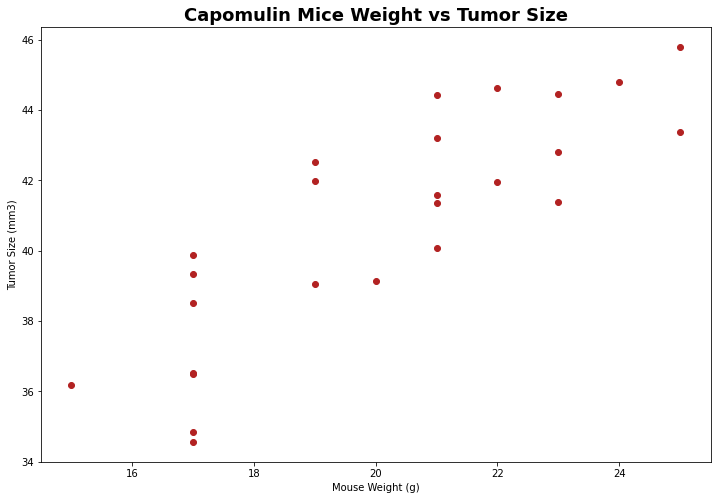

In [32]:
plt.figure(figsize=(12,8))

plt.scatter(weightTumor_df["Weight (g)"], weightTumor_df["Tumor Volume (mm3)"], color = "firebrick")
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")

plt.show()

In [33]:
weightTumor_df.corr() 

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [34]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts

In [35]:
sts.pearsonr(weightTumor_df["Weight (g)"], weightTumor_df["Tumor Volume (mm3)"]) 

(0.8419363424694717, 1.322572243471279e-07)

In [36]:
feature = weightTumor_df["Weight (g)"]
target = weightTumor_df["Tumor Volume (mm3)"]

y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


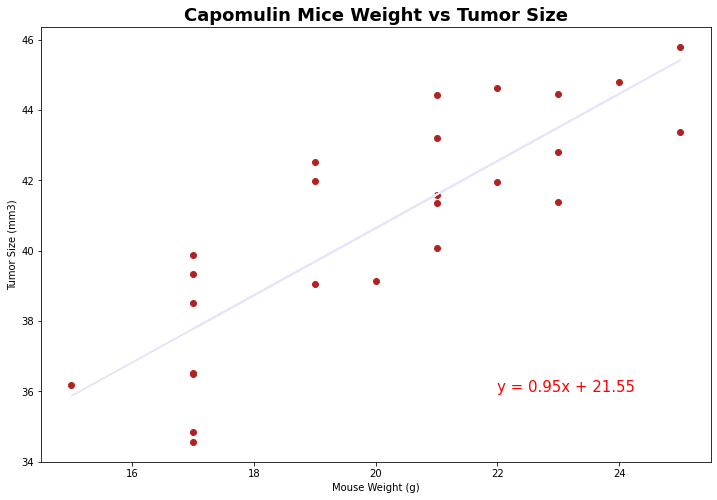

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(12,8))

plt.scatter(feature, target, color = "firebrick")
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")
plt.plot(feature, regress_values, color="lavender")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()

In [38]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Tumor Volume (mm3)   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     56.00
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           1.32e-07
Time:                        17:04:04   Log-Likelihood:                -48.966
No. Observations:                  25   AIC:                             101.9
Df Residuals:                      23   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5522      2.591      8.318      0.000      16.192      26.912
Weight (g)     0.9544      0.128      7.483      0.000       0.691       1.218
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.951
Skew:                          -0.025   Prob(JB):                        0.622
Kurtosis:                       2.046   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'

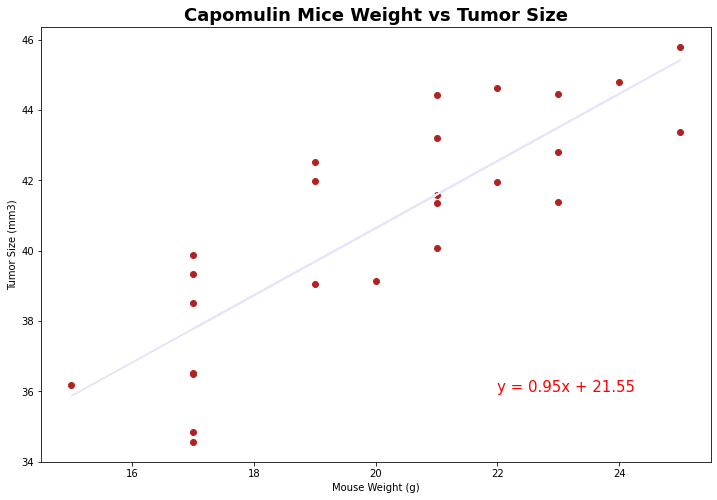

In [40]:
plt.figure(figsize=(12,8))

plt.scatter(feature, target, color = "firebrick")
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")
plt.plot(feature, regress_values, color="lavender")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()